About Dataset
Data Description
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

Domain
Cement manufacturing

Context
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

Attribute Information
Cement : measured in kg in a m3 mixture
Blast : measured in kg in a m3 mixture
Fly ash : measured in kg in a m3 mixture
Water : measured in kg in a m3 mixture
Superplasticizer : measured in kg in a m3 mixture
Coarse Aggregate : measured in kg in a m3 mixture
Fine Aggregate : measured in kg in a m3 mixture
Age : day (1~365)
Concrete compressive strength measured in MPa

In [80]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # data visualization library

from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from sklearn.metrics import r2_score # evaluation metric
from sklearn.metrics import mean_absolute_error # evaluation metric
from sklearn.metrics import mean_squared_error # evaluation metric
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.model_selection import KFold # cross validation
from sklearn.pipeline import Pipeline # cross validation
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees Regressor model
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor model
from sklearn.preprocessing import StandardScaler # Standard Scaler
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Regressor model
from sklearn.datasets import make_regression # Generate a random regression problem




from IPython.display import display, HTML # Permite utilizar la función display() para mostrar dataframes en el notebook
display(HTML("<style>.container { width:98% !important; }</style>")) # Ajusta el ancho de la página

Los modelos de regresión como RandomForestRegressor, GradientBoostingRegressor y ExtraTreesRegressor son técnicas de aprendizaje automático que combinan múltiples árboles de decisión para mejorar la precisión de las predicciones.

1) RandomForestRegressor construye una colección de árboles de decisión entrenados en diferentes subconjuntos de datos, utilizando el promedio de sus predicciones para reducir la varianza y evitar el sobreajuste. 
SCIKIT-LEARN.ORG

2) GradientBoostingRegressor se enfoca en corregir los errores de predicción de árboles anteriores, construyendo secuencialmente nuevos árboles que se centran en los residuos de los modelos previos. 
SCIKIT-LEARN.ORG

3) ExtraTreesRegressor es similar al RandomForestRegressor, pero introduce mayor aleatoriedad al seleccionar puntos de división y características, lo que puede mejorar la precisión y reducir el tiempo de entrenamiento. 
MDPI.COM

In [73]:
data = pd.read_csv("concrete_clean.csv")
print(data.shape)

X = data.drop('strength', axis=1).values  # Características
Y = data['strength'].values  # Clase

data

(1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176,29.89
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714,23.51
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176,29.22
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176,45.85
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176,18.29
...,...,...,...,...,...,...,...,...,...
1025,0.075342,0.000000,0.829585,0.464856,0.310559,0.465116,0.529353,0.074176,13.29
1026,0.980137,0.000000,0.000000,0.159744,0.875776,0.148547,0.751882,0.005495,41.30
1027,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,44.28
1028,0.547945,0.105732,0.000000,0.848243,0.000000,0.380814,0.190667,0.739011,55.06


In [74]:
# Separar características (X) y variable objetivo (y)
X = data.drop("strength", axis=1)
y = data["strength"]

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que incluya escalado de datos y el modelo
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestRegressor(random_state=42))
])

# Definir la rejilla de hiperparámetros para optimizar el RandomForest
param_grid = {
    "rf__n_estimators": [100, 200, 300],
    "rf__max_depth": [None, 10, 20, 30],
    "rf__min_samples_split": [2, 5, 10]
}

# Configurar GridSearchCV con 5-fold cross validation y usando R² como métrica
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el mejor R² obtenido en validación
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R² en validación:", grid_search.best_score_)

# Evaluación final en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred)
print("R² en el conjunto de prueba:", r2_rf)


Mejores hiperparámetros: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Mejor R² en validación: 0.898389660841568
R² en el conjunto de prueba: 0.9118950313614542


In [75]:
# Supongamos que 'df' es tu DataFrame y la variable objetivo es 'strength'
X = data.drop("strength", axis=1)
y = data["strength"]

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con escalado (aunque para modelos basados en árboles no es estrictamente necesario,
# a veces ayuda en la optimización de hiperparámetros)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("gbr", GradientBoostingRegressor(random_state=42))
])

# Definición de la rejilla de hiperparámetros para optimizar el modelo
param_grid = {
    "gbr__n_estimators": [100, 200, 300],
    "gbr__learning_rate": [0.01, 0.1, 0.2],
    "gbr__max_depth": [3, 5, 7],
    "gbr__subsample": [0.7, 0.8, 1.0]
}

# Configurar GridSearchCV con validación cruzada de 5 folds usando R² como métrica
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el mejor R² en validación
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R² en validación:", grid_search.best_score_)

# Evaluación final en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_gbr = r2_score(y_test, y_pred)
print("R² en el conjunto de prueba:", r2_gbr)


Mejores hiperparámetros: {'gbr__learning_rate': 0.2, 'gbr__max_depth': 3, 'gbr__n_estimators': 300, 'gbr__subsample': 1.0}
Mejor R² en validación: 0.9270993611585144
R² en el conjunto de prueba: 0.9248551160008766


In [76]:
# Supongamos que 'df' es tu DataFrame y la variable objetivo es 'strength'
X = data.drop("strength", axis=1)
y = data["strength"]

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que incluya el modelo ExtraTreesRegressor
pipeline = Pipeline([
    ("etr", ExtraTreesRegressor(random_state=42))
])

# Definir la rejilla de hiperparámetros a optimizar
param_grid = {
    "etr__n_estimators": [100, 200, 300],
    "etr__max_depth": [None, 10, 20, 30],
    "etr__min_samples_split": [2, 5, 10]
}

# Configurar GridSearchCV con validación cruzada de 5 folds usando R² como métrica
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el mejor R² obtenido en validación
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R² en validación:", grid_search.best_score_)

# Evaluación final en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_etr = r2_score(y_test, y_pred)
print("R² en el conjunto de prueba:", r2_etr)


Mejores hiperparámetros: {'etr__max_depth': 20, 'etr__min_samples_split': 2, 'etr__n_estimators': 100}
Mejor R² en validación: 0.9155273709192336
R² en el conjunto de prueba: 0.9078170949043322


C:\Users\ardil\AppData\Local\Temp\ipykernel_5840\607604317.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Modelo", y="R2", data=df_r2, palette="viridis")


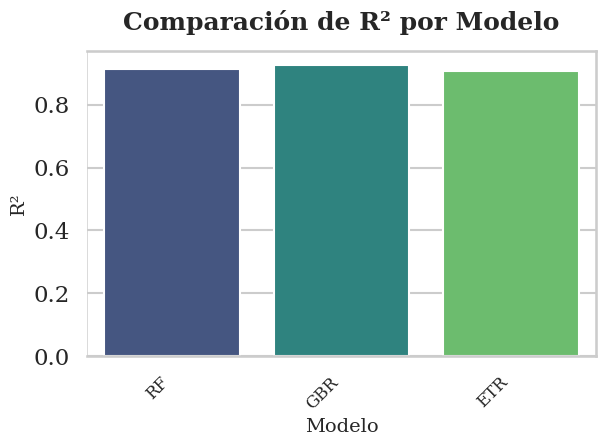

In [84]:
df_r2 = pd.DataFrame({
    "Modelo": ["RF", "GBR", "ETR"],
    "R2": [r2_rf, r2_gbr, r2_etr]
})


# Crear el gráfico de barras
sns.barplot(x="Modelo", y="R2", data=df_r2, palette="viridis")

# Personalizar títulos y etiquetas
plt.title("Comparación de R² por Modelo", fontsize=18, weight='bold', pad=15)
plt.xlabel("Modelo", fontsize=14)
plt.ylabel("R²", fontsize=14)

# Ajustar la visualización
plt.xticks(rotation=45, ha='right', fontsize=12)

# Hacer el eje Y más delgado
plt.gca().spines['left'].set_linewidth(0.5)  # Ajusta el grosor del eje Y

plt.tight_layout()

# Mostrar el gráfico
plt.show()

Un valor de R² de 0.91 en los modelos RandomForestRegressor, GradientBoostingRegressor y ExtraTreesRegressor indica que cada uno de estos modelos explica el 91% de la variabilidad de la variable dependiente en los datos de entrenamiento. Este es un resultado notable, ya que valores de R² cercanos a 1 reflejan un ajuste excelente del modelo a los datos. Sin embargo, es esencial considerar que R² por sí solo no garantiza la calidad del modelo. Es recomendable evaluar otras métricas de desempeño y realizar validaciones cruzadas para asegurar que el modelo generalice bien a datos no vistos y no esté sobreajustado. 

In [ ]:
# Inicializar los modelos
models = {
    'RF': RandomForestRegressor(n_estimators=100, random_state=42),
    'GBR': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'ETR': ExtraTreesRegressor(n_estimators=100, random_state=42)
}

# Evaluar cada modelo utilizando validación cruzada
for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    print(f'{name} - Error cuadrático medio negativo promedio: {-mean_score:.4f}')

RF - Error cuadrático medio negativo promedio: 25.1341
GBR - Error cuadrático medio negativo promedio: 27.0960
ETR - Error cuadrático medio negativo promedio: 22.9029


C:\Users\ardil\AppData\Local\Temp\ipykernel_5840\111320131.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=ecm_values, palette='viridis')


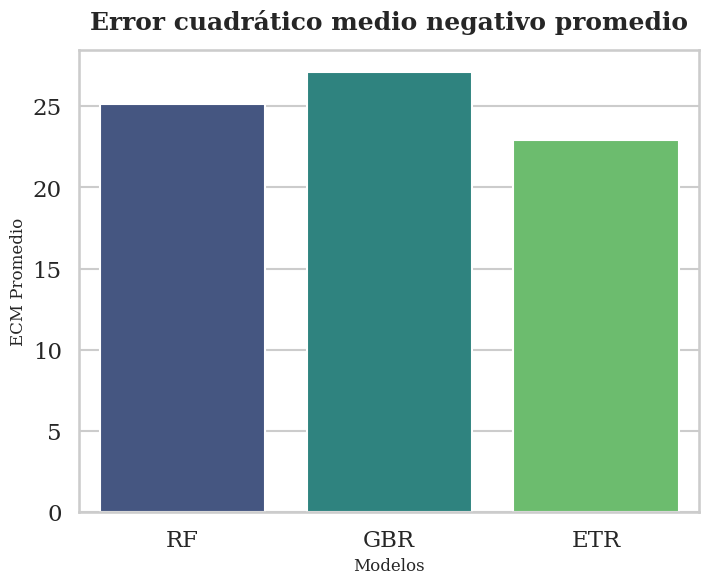

In [91]:
# Datos
models = ['RF', 'GBR', 'ETR']
ecm_values = [25.1341, 27.0960, 22.9029]

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=ecm_values, palette='viridis')

# Títulos y etiquetas
plt.title("Error cuadrático medio negativo promedio", fontsize=18, weight='bold', pad=15)
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('ECM Promedio', fontsize=12)

# Mostrar la gráfica
plt.show()


Un R² de 0.92 es un valor bastante alto, lo que sugiere que los modelos explican el 92% de la variabilidad de la variable dependiente.

Sin embargo, el ECM proporciona una medida más directa de la precisión de las predicciones. En este caso, el ExtraTreesRegressor (ETR) tiene el ECM más bajo (22.9029), seguido por el RandomForestRegressor (RF) (25.1341) y el GradientBoostingRegressor (GBR) (27.0960).

Esto indica que, aunque los tres modelos tienen un R² alto, el ETR es el que realiza las predicciones más precisas en promedio.